# DC GAN for brain MRI image data

In [1]:
# Importing dependencies

import tensorflow as tf
print(tf.__version__)
import glob
import cv2

2.1.0


In [2]:
images_train = [cv2.imread(file) for file in glob.glob("H://PatternLab//PatternRecognition//Datasets//brain//keras_png_slices_data//keras_png_slices_train//case_00*.png")]

In [3]:
# importing helper function to handle image data
from image_helper import tf_plot_gallery as plot_gallery


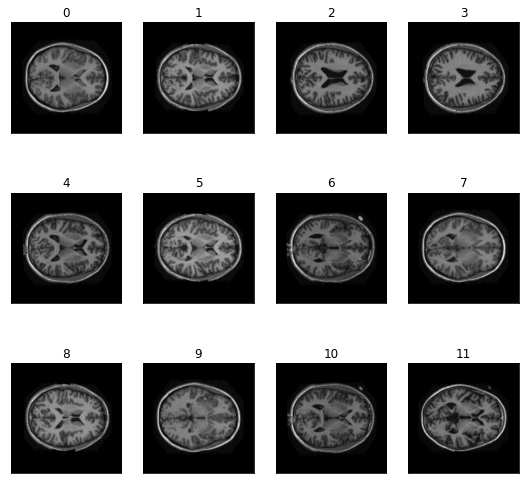

In [10]:
plot_gallery(images_train, images_train[0].shape)

In [11]:
# converting RGB to grayscale
X_train = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images_train]


In [12]:
#resizing images to 128 x 128 
X_train = [cv2.resize(image, (128,128)) for image in X_train]

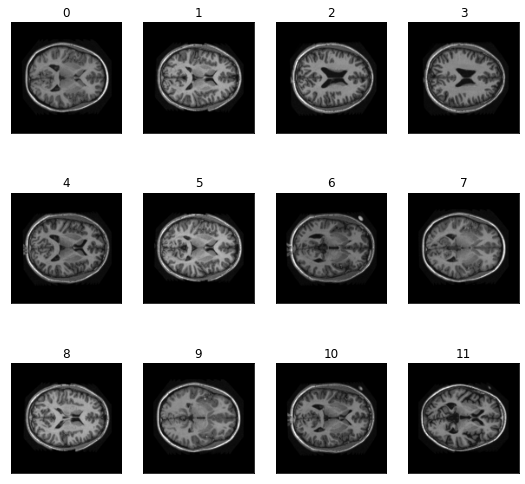

In [15]:
plot_gallery(X_train, (128,128,1))

In [19]:
#converting to tensors
tf_X_train = tf.convert_to_tensor(X_train, dtype = tf.float32)
tf_X_train.shape

print('max = ', tf.reduce_max(tf_X_train).numpy())
print('min = ', tf.reduce_min(tf_X_train).numpy())


max =  252.0
min =  0.0


In [20]:
#Normalising the dataset 
tf_X_train = (tf_X_train - 127.5)/127.5

In [22]:
print('max = ', tf.reduce_max(tf_X_train).numpy())
print('min = ', tf.reduce_min(tf_X_train).numpy())


max =  0.9764706
min =  -1.0


In [23]:
#Creating a train batch using tensorflow

In [25]:
BUFFER_SIZE = 8000
BATCH_SIZE = 256

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(tf_X_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset

<BatchDataset shapes: (None, 128, 128), types: tf.float32>